# Honolulu Climate Analysis

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
engine = create_engine('sqlite:///hawaii.sqlite')
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station
from sqlalchemy.orm import Session
session = Session(bind=engine)

## Precipitation Analysis

In [11]:
## retrieves the last 12 months of precipitation data
## most_recent_record is '2017-08-23'
last_year_prcp = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date > '2016-08-23').all()
last_year_prcp_df = pd.DataFrame(last_year_prcp)
last_year_prcp_df.set_index('date', inplace=True)
last_year_prcp_df.head(3)

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00


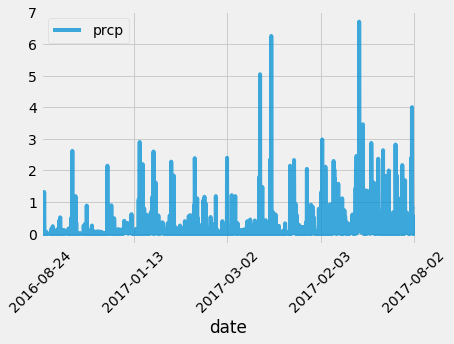

In [21]:
## plotting prcp from the results using the DataFrame `plot` method
last_year_prcp_df.plot(use_index=True, y='prcp', alpha=.75)
plt.xlabel('date')
plt.xticks(rotation=45)
plt.show()

In [5]:
## summary statistics for the precipitation data
prcp_stats_df = last_year_prcp_df.describe()
prcp_stats_df

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [6]:
## a query to calculate the total number of stations
all_stations = session.query(Station).count()
all_stations

9

In [7]:
## a query to find the most active stations
from sqlalchemy import func
most_active_stations = session.query(Measurement.station, func.count(Measurement.date)).\
    group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()
most_active_stations_df = pd.DataFrame(most_active_stations, columns=['station', 'measurement count'])
## finds the most activate station
most_active_station = most_active_stations[0][0]
most_active_station

'USC00519281'

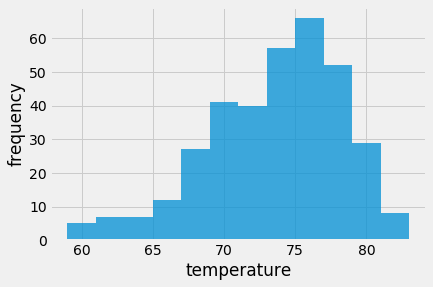

In [24]:
## a query to retrieve the last 12 months of temperature observation data (tobs)
## most_recent_record is '2017-08-23'
last_year_temp_most_active = session.query(Measurement.tobs)\
    .filter(Measurement.date > '2016-08-23').filter(Measurement.station == most_active_station).all()
last_year_temp_most_active_df = pd.DataFrame(last_year_temp_most_active)
last_year_temp_most_active_df.hist(bins=12, alpha=.75)
plt.xlabel('temperature')
plt.ylabel('frequency')
plt.title('')
plt.show()

## Temperature Analysis

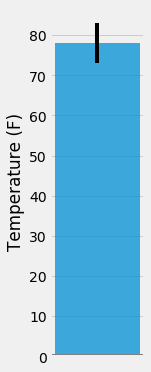

In [23]:
def calc_temps(start_date, end_date):
    summary_stats = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date, Measurement.date <= end_date).all()
    return summary_stats[0]

## uses calc_temps to calculate the min, avg, and max temperatures
## trip start september 21 to september 28
summary_stats = calc_temps('2016-09-21', '2016-09-28')
TMIN = summary_stats[0]
TAVG = summary_stats[1]
TMAX = summary_stats[2]
plt.figure(figsize=(1.5, 6))
plt.bar(0, TAVG, width =.2, alpha=.75)
plt.axes().get_xaxis().set_visible(False)
plt.ylabel('Temperature (F)')
plt.axhline(y=0, color='grey')
plt.errorbar(0, [TMIN, TMAX], color='black')
plt.show()
